# Imports

In [40]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Vars

In [7]:
cooc_path = "../data/cooccurence_matrix.csv"

# Load data

In [34]:
cooc_matrix = pd.read_csv(cooc_path, sep=";", index_col=[0]).fillna(0) 
cooc_matrix.head()

bpol_11  bpol_air_fra  bpol_b  bpol_koblenz  bpol_kueste  \
bpol_11             1.0           0.0     6.0           1.0          8.0   
bpol_air_fra        0.0           0.0     7.0           5.0          2.0   
bpol_b              4.0           0.0     7.0           0.0          3.0   
bpol_b_einsatz      1.0           0.0     1.0           0.0          0.0   
bpol_bepo           1.0           1.0     3.0           0.0          0.0   

                bpol_nord  bpol_nrw  bpol_pir  bremenpolizei  lka_bayern  ...  \
bpol_11               2.0       0.0       2.0            0.0         0.0  ...   
bpol_air_fra          2.0       3.0       2.0            0.0         0.0  ...   
bpol_b                3.0       1.0       6.0            0.0         0.0  ...   
bpol_b_einsatz        0.0       0.0       1.0            0.0         0.0  ...   
bpol_bepo             0.0       0.0       0.0            6.0         0.0  ...   

                polizei_nrw_hsk  polizei_nrw_kr  polizei_nrw_rek  \
bpol_11                     0.0             0.0              0.0   
bpol_air_fra                0.0             0.0              0.0   
bpol_b                      0.0             0.0              0.0   
bpol_b_einsatz              0.0             0.0              0.0   
bpol_bepo                   0.0             0.0              0.0   

                polizei_nrw_waf  polizei_nrw_wes  polizei_oha  \
bpol_11                     0.0              0.0          0.0   
bpol_air_fra                0.0              0.0          0.0   
bpol_b                      0.0              0.0          0.0   
bpol_b_einsatz              0.0              0.0          0.0   
bpol_bepo                   0.0              0.0          0.0   

                polizei_whv_fri  polizeibb_e  polizeiberlin_e  polizeipf  
bpol_11                     0.0          0.0              0.0        0.0  
bpol_air_fra                0.0          0.0              0.0        0.0  
bpol_b                      0.0          0.0              0.0        0.0  
bpol_b_einsatz              0.0          0.0              0.0        0.0  
bpol_bepo                   0.0          0.0              0.0        0.0  

[5 rows x 160 columns]

In [35]:
network = nx.from_pandas_adjacency(cooc_matrix)

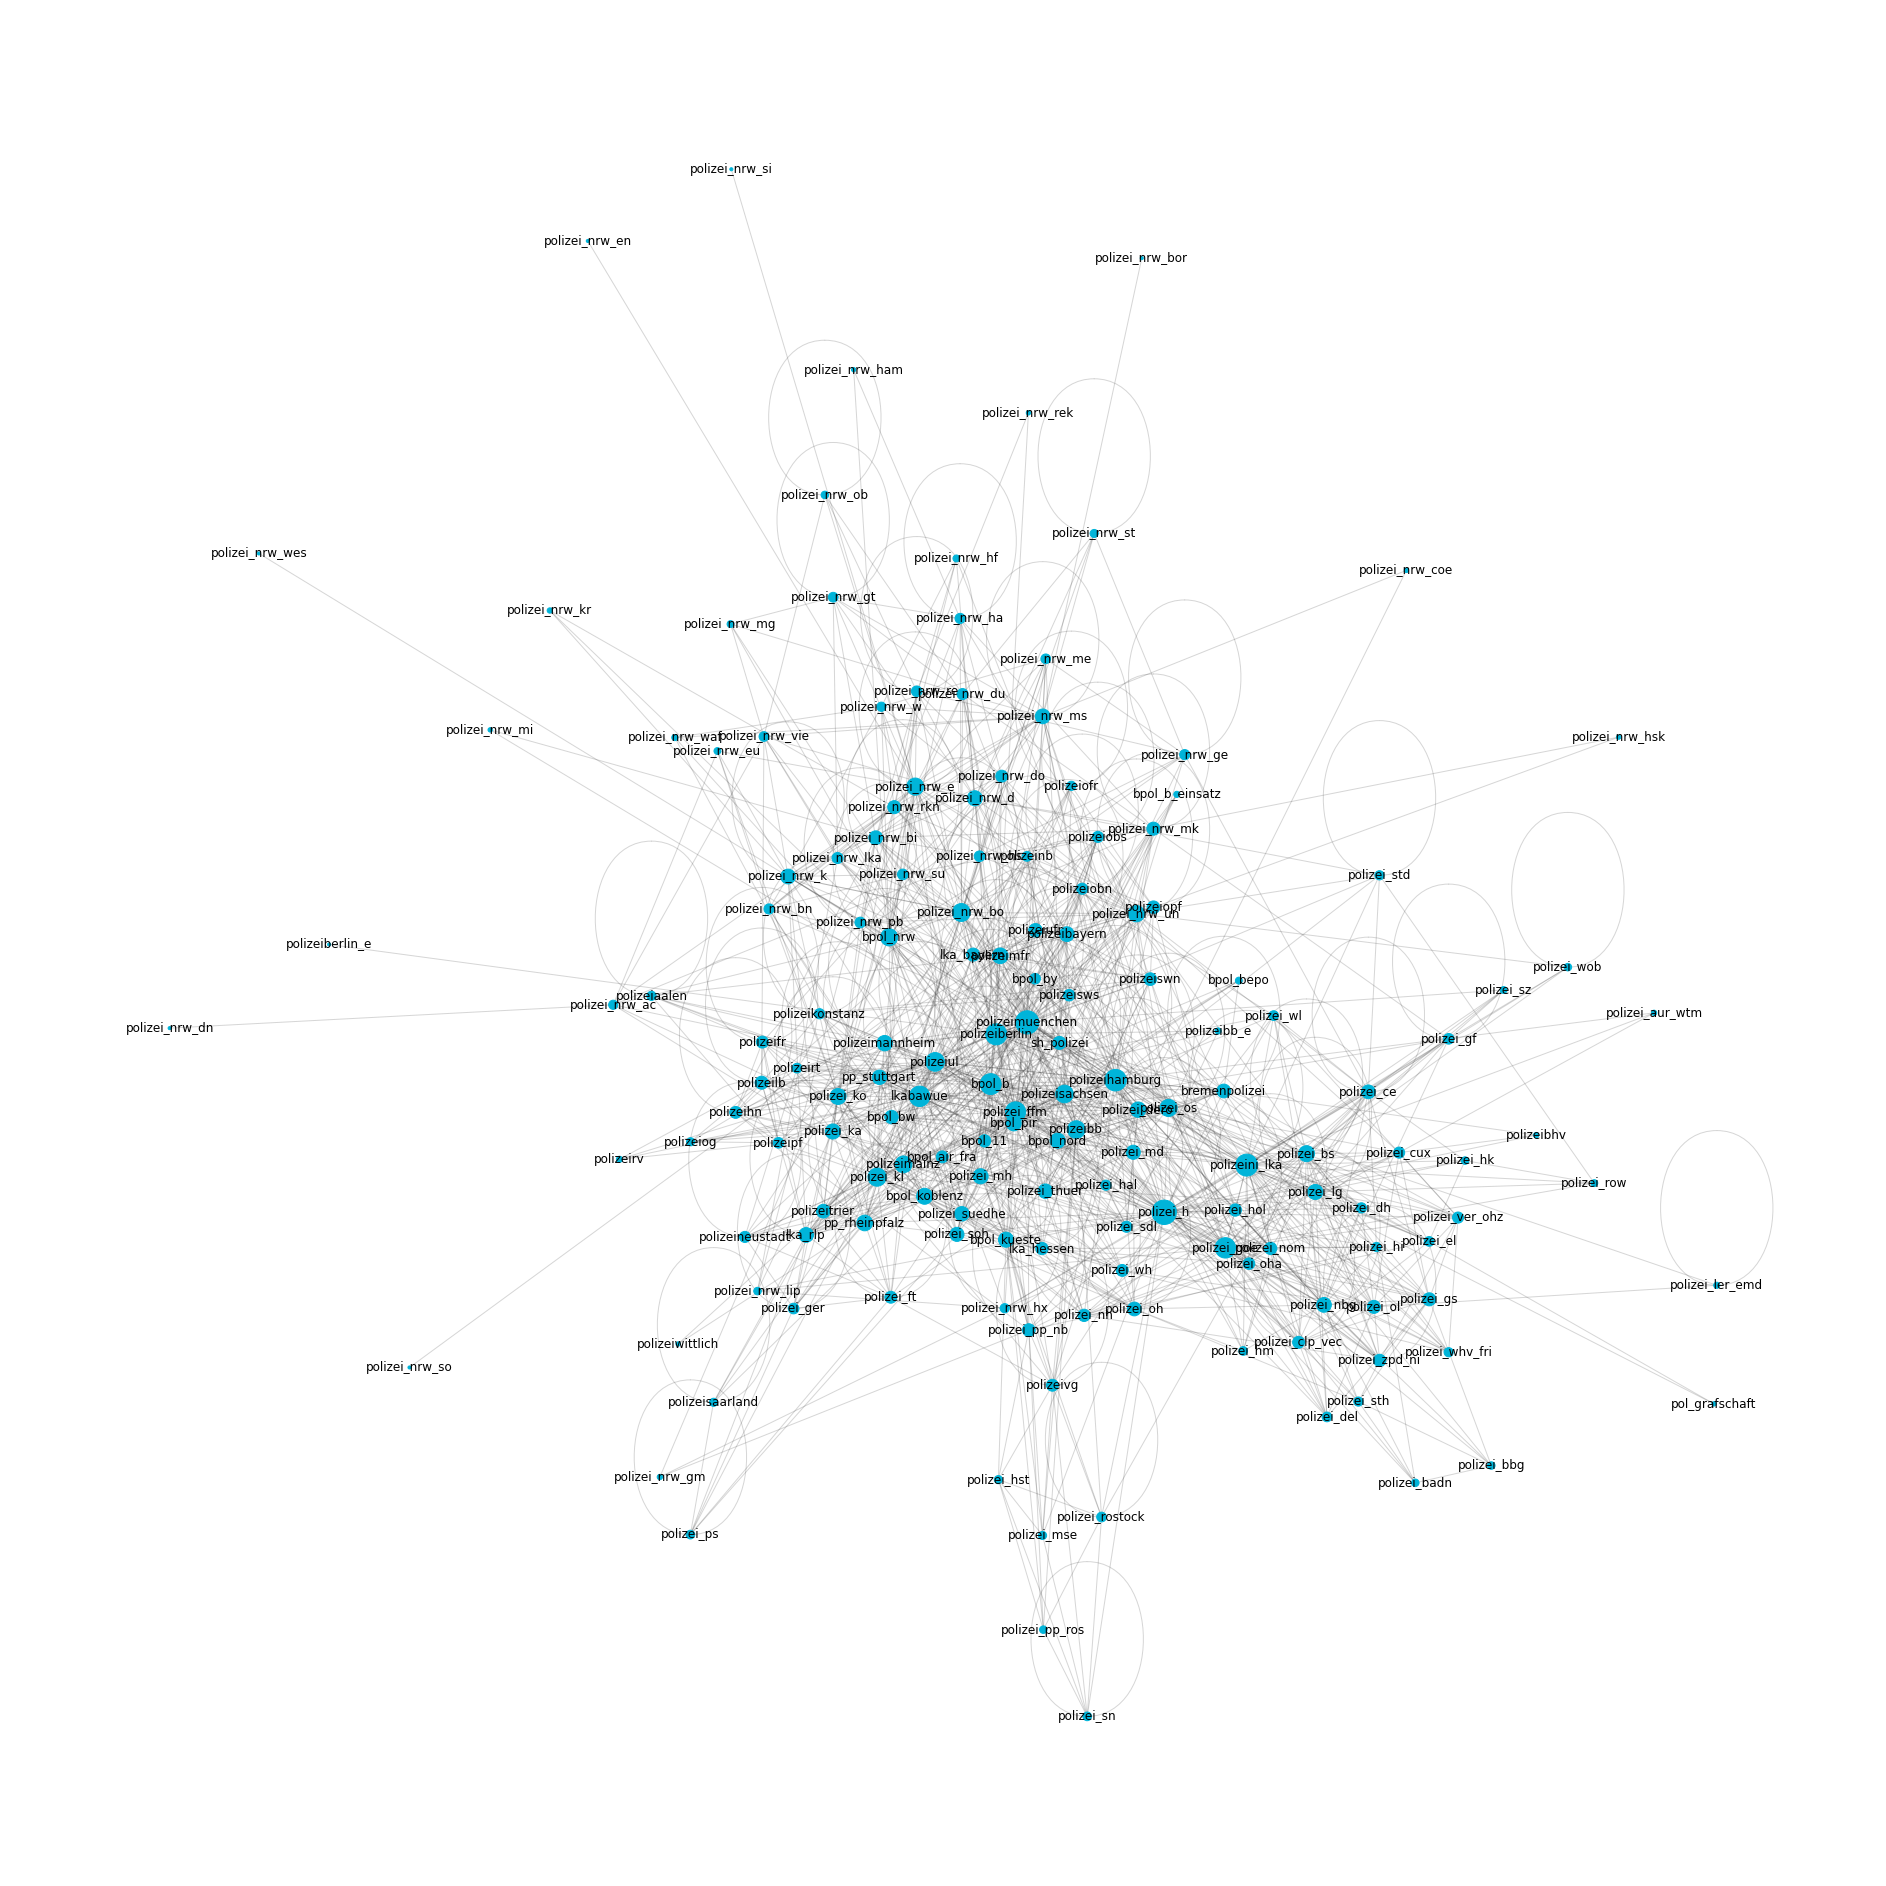

In [66]:
plt.figure(figsize=(26,26))

centrality = nx.degree_centrality(network)
closeness_node_sizes = np.fromiter(centrality.values(), dtype=float) * 1500

pos = nx.spring_layout(network)
nx.draw(network, node_color='#00b4d9', pos=pos, with_labels=True,
        edge_color = (.2,.2,.2,.2),
       node_size=closeness_node_sizes) 

plt.savefig("../res/imgs/force_directed_fullgraph.svg")